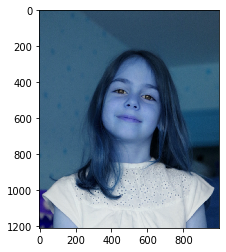

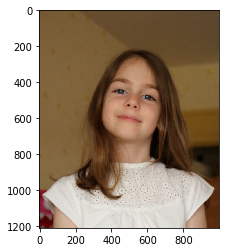

顔の座標= 319 308 405 405


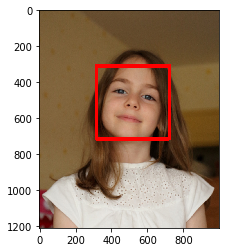

In [7]:
# OpenCVで画像を表示し、顔認識

import matplotlib.pyplot as plt
import cv2

# カスケードファイルを指定して検出器を作成 
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 画像を読み込んでグレイスケールに変換する
img = cv2.imread("face-detect/girl.jpg")

plt.imshow(img)
plt.show()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔認識を実行
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 結果を確認 
if len(face_list) == 0:
    print("失敗")
    quit()
# 認識した部分に印をつける
for (x,y,w,h) in face_list:
    print("顔の座標=", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

#画像を出力
cv2.imwrite("face-detect/face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()




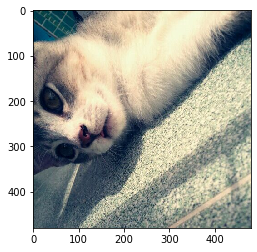

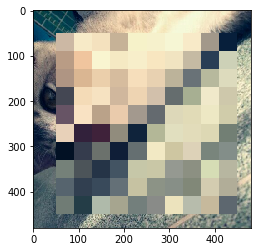

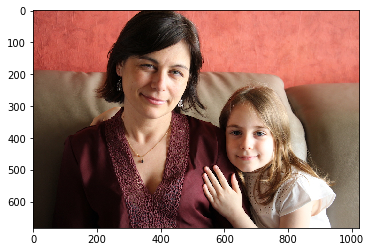

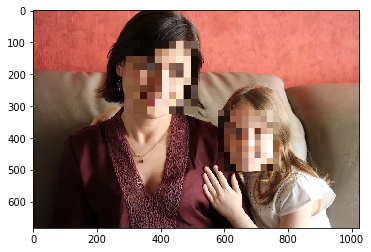

In [20]:
#モザイク処理を行う関数を定義

import cv2

def mosaic(img, rect, size):
    # モザイクをかける領域を取得
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 一度縮小して拡大する
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 画像にモザイク画像を重ねる
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2




#猫の画像にモザイクをかける

import matplotlib.pyplot as plt


# 画像を読み込んでモザイクをかける
img = cv2.imread("face-detect/cat.jpg")
mos = mosaic(img, (50, 50, 450, 450), 10)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# モザイクをかけた画像を出力
cv2.imwrite("face-detect/cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()



#人の顔にモザイクをかける



# カスケードファイルを指定して分類器を作成
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 画像を読み込んでグレイスケールに変換 
img = cv2.imread("face-detect/family.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 顔検出を実行 
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

# 認識した部分の画像にモザイクをかける 
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

#画像を出力
cv2.imwrite("face-detect/family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()




In [23]:
# SK-learnの手書き数字を学習させる

from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

# データを読み込む 
digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1, 64)) # 二次元配列を一次元配列に変換

# データを学習用とテスト用に分割する
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# データを学習 
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

# 予測して精度を確認する
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

joblib.dump(clf,'digits.pkl')

0.9416666666666667


C:\Users\2180020\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


['digits.pkl']

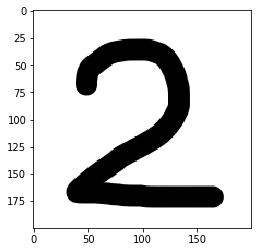

my2.png = 2
my4.png = 4


In [38]:
import cv2
from sklearn.externals import joblib
import matplotlib.pyplot as plt


img = cv2.imread("face-detect/my2.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


def predict_digit(filename):
    # 学習済みデータを読み込む
    clf = joblib.load("digits.pkl")
    # 自分で用意した手書きの画像ファイルを読み込む
    my_img = cv2.imread(filename)
    # 画像データを学習済みデータに合わせる
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16 # 白黒反転する
    # 二次元を一次元に変換
    my_img = my_img.reshape((-1, 64))
    # データ予測する
    res = clf.predict(my_img)
    return res[0]

# 画像ファイルを指定して実行
n = predict_digit("face-detect/my2.png")
print("my2.png = " + str(n))
n = predict_digit("face-detect/my4.png")
print("my4.png = " + str(n))



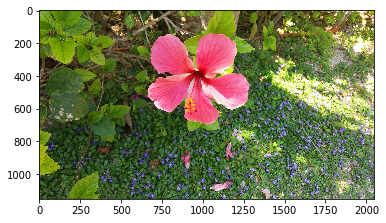

97 64 30 28
101 9 90 81


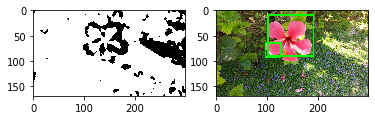

In [40]:
#オブジェクトを抽出してみる

import cv2
import matplotlib.pyplot as plt

# 画像を読み込んでリサイズ
img = cv2.imread("face-detect/flower.jpg")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


img = cv2.resize(img, (300, 169))

# 色空間を二値化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0) 
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

# 画面左側に二値化した画像を描画 
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

# 輪郭を抽出 
cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[0]
# 抽出した枠を描画 
for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    # 大きすぎたり小さすぎたり領域を除去
    if w < 30 or w > 200: continue
    print(x,y,w,h) # 結果を出力
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 画面右側に抽出結果を描画 
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("face-detect/find_contours.png", dpi=200)
plt.show()



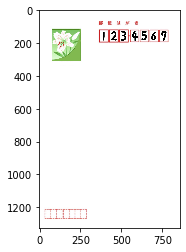

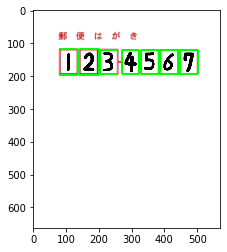

C:\Users\2180020\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\2180020\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\2180020\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\2180020\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\2180020\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning sc

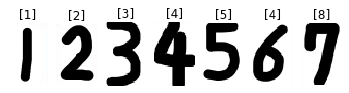

In [57]:
#はがきの郵便番号を抽出


import cv2
import matplotlib.pyplot as plt


img = cv2.imread("face-detect/hagaki1.png")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


# ハガキ画像から郵便番号領域を抽出する関数
def detect_zipno(fname):
    # 画像を読み込む
    img = cv2.imread(fname)
    # 画像のサイズを求める
    h, w = img.shape[:2]
    # ハガキ画像の右上のみ抽出する
    img = img[0:h//2, w//3:]
    
    # 画像を二値化 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0) 
    im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
    
    # 輪郭を抽出 
    cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[0]
    
    # 抽出した輪郭を単純なリストに変換
    result = []
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        # 大きすぎる小さすぎる領域を除去 
        if not(50 < w < 70): continue
        result.append([x, y, w, h])
    # 抽出した輪郭が左側から並ぶようソート 
    result = sorted(result, key=lambda x: x[0])
    # 抽出した輪郭が近すぎるものを除去 
    result2 = []
    lastx = -100
    for x, y, w, h in result:
        if (x - lastx) < 10: continue
        result2.append([x, y, w, h])
        lastx = x
    # 緑色の枠を描画 
    for x, y, w, h in result2:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    return result2, img

if __name__ == '__main__':
    # ハガキ画像を指定して領域を抽出
    cnts, img = detect_zipno("face-detect/hagaki1.png")

    # 画面に抽出結果を描画
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.savefig("detect-zip.png", dpi=200)
    plt.show()


    

#郵便番号を判定

import matplotlib.pyplot as plt

from sklearn.externals import joblib

# 学習済み手書き数字のデータを読込
clf = joblib.load("digits.pkl")

# 画像から領域を読み込む
cnts, img = detect_zipno("face-detect/hagaki1.png")

# 読み込んだデータをプロット
for i, pt in enumerate(cnts):
    x, y, w, h = pt
    # 枠線の輪郭分だけ小さくする
    x += 8
    y += 8
    w -= 16
    h -= 16
    # 画像データを取り出す
    im2 = img[y:y+h, x:x+w]
    # データを学習済みデータに合わせる
    im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) # グレイスケールに
    im2gray = cv2.resize(im2gray, (8, 8)) # リサイズ
    im2gray = 15 - im2gray // 16 # 白黒反転
    im2gray = im2gray.reshape((-1, 64)) # 一次元に変換
    # データ予測する
    res = clf.predict(im2gray)
    # 画面に出力
    plt.subplot(1, 7, i + 1)
    plt.imshow(im2)
    plt.axis("off")
    plt.title(res)

plt.show()
